<a href="https://colab.research.google.com/github/mrefugionv/S4--INSTACART/blob/main/P4_DATA_WRANGLING_INSTACART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.



## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

1. Primero habra que leer los datos de los archivos csv, para ello se importa la librería pandas y se leera cada archivo.
2. Imprimir las primeras líneas cada vez que se lea un archivo para verificar se haya separado correctamente las columnas.
3. Indicar un más argumentos en el metodo "read_csv" si es necesario para la correcta lectura. Por ejemplo indicar el sepradador ("sep=''"), si los archivos no vienen en formato estándar.


In [ ]:
# importar librerías
import pandas as pd   #para trabajar con dataframes
from matplotlib import pyplot as plt  # mas adelante se necesitara para generar gráficas

In [ ]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv('datasets/instacart_orders.csv',sep=';')
df_products = pd.read_csv('datasets/products.csv',sep=';')
df_aisles = pd.read_csv('datasets/aisles.csv',sep=';')
df_departments = pd.read_csv('datasets/departments.csv',sep=';')
df_order_products = pd.read_csv('datasets/order_products.csv', sep=';')

#print(df_departments.head()) -- Se imprimieron las primres lines de cada uno para verificar que se ...
#...separaran correctamente las columnas con el separadador adecuador

In [ ]:
# mostrar información del DataFrame
print(df_instacart_orders.info(show_counts= True))
#Se agregar argumento "show_counst=True" para asegurarnos que se muestren los recuentos no nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [ ]:
# mostrar información del DataFrame
print(df_products.info(show_counts= True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [ ]:
# mostrar información del DataFrame
print(df_aisles.info(show_counts= True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [ ]:
# mostrar información del DataFrame
print(df_departments.info(show_counts= True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


In [ ]:
# mostrar información del DataFrame
print(df_order_products.info(show_counts= True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

En general tenemos una buena base para empezar a trabajar:
* Se recuperaron los dataframes sin incosistencias en los títulos de las columnas (todos estan en formato snake_case)
* En cuanto datos faltantes solo son los de las siguientes columnas:
   - days_since_prior_order, del df_instacart_orders. Falta alrededor del 6% de los datos, lo cual puede deberse a que sean las primeras ordenes de los usuarios correspondientes.Esto se puede revisar, calculando el la cantidad de valores únicos en la columna de user_id, si empata esta cantidad con los valores ausentes es muy probable que esta hipótesis sea correcta.
   - product_name , de df_products. Falta alrededor de 3% de los valores.
   - add_to_cart_order, de df_order_products. Falta menos del 1%.
*En cuanto a los tipos de datos que se leen, todos son congruentes con lo que expresan de acuerdo a la descripción. La mejora que podemos hacer para un mejor manejo es el cambio de todos los "ID" de tipos numerico a string, ya que con ellos no se hacen operaciones aritméticas.



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aqui tu plan para el Paso 2. Preprocesamiento de los datos.

1. Para verificar tipos de datos y corregir : Revisar en las impresiones del método .info() ya obtenidas en la sección anterior.
2. Identificar y eliminar los valores duplicados: Con el método duplicated() revisar si no hay filas completas duplicadas
    y, de acuerdo al caso y la información que representan los datos, aplicarlo a columnas por separado ayudara a distinguir
    si estos duplicados hay que eliminarlos. Se pueden eliminar los duplicados con el método .drop_duplicates().
3. Identificar y completar los valores ausentes: Los valores auscentes los podemos identificar al leer las características del
    df que se obtiene con el método .info() , o bien con el método .isna() , y se pueden rellenar con un valor conveniente con el método .fillna().
    


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
print(df_instacart_orders.duplicated().sum()) #suma cantidad de Trues que resultaron del método duplicated
print(df_instacart_orders['order_id'].duplicated().sum())  # aplicamos método duplicated() a columan order_id

15
15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Sí tenemos  15 duplicados. Todas estas ordenes repetidas, tienen en comun que ya existe una fila completamente igual (mismos valores en cada columna) a esa. También se podría hacer la comprobación de los duplicados, aplicando el método .duplicated() únicamente a la columna "order_id", ya que contiene los identificadores únicos para cada orden.

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

print(f'Valor mínimo de hora:', df_instacart_orders['order_hour_of_day'].min())
print(f'Valor máximo de hora:',df_instacart_orders['order_hour_of_day'].max())
# Hora vienen en formato representados por numeros del 0 al 23
print('')
print(f'Duplicados en ordenes hechas a las 2am :\n',df_instacart_orders[df_instacart_orders['order_hour_of_day'] == 2].duplicated().sum())


Valor mínimo de hora: 0
Valor máximo de hora: 23

Duplicados en ordenes hechas a las 2am :
 15


¿Qué sugiere este resultado?

Que todos los valores duplicados fueron hechos en este horario (a las 2am), pero no es el mismo pedido.

In [ ]:
# Elimina los pedidos duplicados
df_instacart_orders.drop_duplicates(inplace=True)  #NO se resetearon los indices, si fuera necesario con .reset_index(drop=True)

In [ ]:
# Vuelve a verificar si hay filas duplicadas
print(df_instacart_orders.duplicated().sum())

0


In [ ]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(df_instacart_orders['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se habian encontrado 15 filas duplicadas, todos de ordenes pedidas a las 2 am, en el dataframe de las ordenes con el método . duplicated(); y se han eliminado estas filas con el método .drop_duplicates()

### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [ ]:
# Verifica si hay IDs duplicadas de productos
print(df_products['product_id'].duplicated().sum())

0


In [ ]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

df_products['product_name'] = df_products['product_name'].str.upper()#Conversion de los str gurdados en la columna de 'product_name' a mayusculas
print(f'Primeras filas de la columna product_name: \n',df_products['product_name'].head() ) #Visualizamos en que formato vienen los nombre = Mayusculas

print('')
print(f'Nombres duplicados:',df_products['product_name'].duplicated().sum())


Primeras filas de la columna product_name: 
 0                           CHOCOLATE SANDWICH COOKIES
1                                     ALL-SEASONS SALT
2                 ROBUST GOLDEN UNSWEETENED OOLONG TEA
3    SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                            GREEN CHILE ANYTIME SAUCE
Name: product_name, dtype: object

Nombres duplicados: 1361


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes

df_products_nonnull = df_products.dropna(subset=['product_name']) #Se eliminan las  ...
#... filas con valores faltantes en columna product_name, creando un nuevo dataframe

print('Info de df sin valores faltantes:\n' )
print(df_products_nonnull.info()) #Revisamos que ya se elimniaron esas filas

print('')
print(f'¿Duplicados en df sin valores faltantes?',df_products_nonnull['product_name'].duplicated().sum())


Info de df sin valores faltantes:

<class 'pandas.core.frame.DataFrame'>
Index: 48436 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     48436 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       48436 non-null  int64 
 3   department_id  48436 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB
None

¿Duplicados en df sin valores faltantes? 104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se reviso si había algún producto duplicado llamando al metodo .duplicated() en todo el dataframe, no hubo filas completas iguales; se le aplico unicamente a la columna del identificador único de producto, tampoco hubo duplicados.

Sin embargo otra manera de identificar si algún producto de encontraba repetido es su nombre, es por ello que se reviso si teniamos valores duplicados en esa columna; para ello se convirtio todos los strings a mayusculas para que python pudiera comparar los nombres sin problemas y se reviso si estos datos duplicados eran solo de los datos ausentes. El resultado fue que sí hay 104 productos duplicados, lo que indica que estos productos tienen dos o más id´s.

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [ ]:
# Revisa si hay IDs duplicadas de productos
print(df_departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No tenemos valores duplicados departamentos duplicados (ni completamente con las mismas características, ni identificadores duplicados). Revisar que los identificadores de cada tabla sean efectivamente únicos es importante por que son la conexión entre ellas y algún error en esta información puede llevar a un análisis de datos no fiable.


### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [ ]:
# Revisa si hay IDs duplicadas de productos
print(df_aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron valores duplicados, ni id´s duplicados. Ahora podemos utilizar la información.


### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())


0


In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

#En este caso los duplicados de valores en cada una de las columanas por separado no representan alguna equivocación,...
#...es suficiente con que no hay repeticiones de filas completas, abajo la explicación:

#ya que cada fila corresponde a un artículo pedido en un pedido:
#'order_id' puede repetirse, por que puede haber en un solo pedido varios productos.
#'product_id'puede repetirse por que puede pedirse el mismo producto en varios pedidos.
#'add_to_cart_order'esta secuencia vuelve iniciar en cada pedido.
#'reordered': se repite, solo toma dos valosres 0 o 1

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el caso del dataframe de order_products no tenemos valores auscentes y tampoco valores duplicados; fue suficiente revisar que no hubiera filas completas con valores repetidos, por lo que representan los valores no tiene ningun sentido revisar duplicados por columnas separadas.

lo anterior porque cada fila del df corresponde a un artículo pedido en un pedido, así que:
'order_id' puede repetirse por que puede haber en un solo pedido varios productos.
'product_id'puede repetirse por que puede pedirse el mismo producto en varios pedidos.
'add_to_cart_order'esta secuencia vuelve iniciar en cada pedido.
'reordered' se repite, solo toma dos valosres 0 o 1

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products['product_name'].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos.

Tenemos 1258 valores auscentes en la columna de los nombres de productos.


In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

print(df_products[df_products['aisle_id'] == 100]['product_name'].isnull().sum())

1258


Describe brevemente cuáles son tus hallazgos.

En efecto, todos los valores auscentes están relacionados con el pasillo con id 100.

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21
print(df_products[df_products['department_id'] == 21]['product_name'].isnull().sum())

1258


Describe brevemente cuáles son tus hallazgos.

En efecto, todos los valores auscentes están relacionados con el departamento de id 21.


In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(df_aisles[df_aisles['aisle_id']==100])
print(df_departments[df_departments['department_id']==21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

En los valores que describen al deparmtamento y al pasillo se lee "missing" (faltante, en español).


In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products['product_name'].fillna('Unknown') # Rellenamos los valores ..
#...auscentes con un str vacio para mantener consistencia en tipo de datos

print(f'Valores faltantes:\n', df_products['product_name'].isna().sum()) #Ya no hay valores auscentes

print(df_products[df_products['product_name']== 'Unknown'].head()) #Una muestra de como han quedado rellenos los valores auscentes


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron 1258 nombres de productos faltantes, en su totalidad pertenecientes a un departamento y un pasillo faltantes. Se rellenaron todos los valores auscentes en la columna de product_name con la palabra 'Unknown' indicando que se desconoce esa informacion y a la vez siendo consistente con el tipo de dato de la columna (string).

### `orders` data frame

In [ ]:
# Encuentra los valores ausentes

print(df_instacart_orders['days_since_prior_order'].isna().sum())

28817


In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

print(f'¿con que valor se representa la primer orden?: ', df_instacart_orders['order_number'].min())
print('')
print(f'Valores ausentes de "dias desde el ultimo pedido" por ser la primer orden:\n', df_instacart_orders[df_instacart_orders['order_number'] == 1]['days_since_prior_order'].isna().sum())

¿con que valor se representa la primer orden?:  1

Valores ausentes de "dias desde el ultimo pedido" por ser la primer orden:
 28817


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Todos los valores auscentes en la columna que guarda el valor de los días transcurridos desde la última orden, se debe a que no había una orden previa, es decir, que es la primer orden que hace el usuario.


### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes
print(df_order_products['add_to_cart_order'].isna().sum())

836


In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f'Valor mínimo:', df_order_products['add_to_cart_order'].min())
print(f'Valor máximo:', df_order_products['add_to_cart_order'].max())

Valor mínimo: 1.0
Valor máximo: 64.0


Describe brevemente cuáles son tus hallazgos.

Tenemos ordenes de hasta 64 productos, hay usuarios que han comprado solo 1 artículo.

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

df_order_products['add_to_cart_order_null'] = df_order_products['add_to_cart_order'].isna() #Genera columna en df que indica True si hay valor auscente en 'add_to_cart_order'
order_id_add_to_cart_null = df_order_products[df_order_products['add_to_cart_order_null'] == True]['order_id'] #Guardar ids de pedidos con valor ausente en 'add_to_cart_order'


In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

df_order_proudcts_add_to_cart_null = df_order_products[df_order_products['add_to_cart_order_null'] == True] # DF de todos los pedidos con datos ausentes
print(f'Cuenta product_id en cada pedido: \n', df_order_proudcts_add_to_cart_null. groupby(by='order_id')['product_id'].count())
print('')
print(f'Valor mínimo de conteo: \n', df_order_proudcts_add_to_cart_null. groupby(by='order_id')['product_id'].count().min())



Cuenta product_id en cada pedido: 
 order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

Valor mínimo de conteo: 
 1


Describe brevemente cuáles son tus hallazgos.

Se ha contado el numero de productos que tenemos en cada orden que tenia valor auscente en 'add_to_cart_order' (número que indica el orden secuencial en que se añadio cada articulo en el carrito).
No todos los pedidos con valores auscentes tienen más de 64 productos, de hecho ninguno.

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_order_products['add_to_cart_order'].fillna('999')
df_order_products['add_to_cart_order'] =df_order_products['add_to_cart_order'].astype(int)
print(df_order_products.info())

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se rellenaron todos los valores ausentes de las con 999 y se tranformo a tipo de dato entero. Se conprobo con .info() que la columna 'add_to_cart_order' paso de ser flotante a entero.


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

El preprocesamiento de los datos consta de tres puntos:
1. Revisar que el tipo de dato de cada columna sea la adecuada.
2. Detectar y eliminar datos duplicados reales:
Para ello hay que revisar que no haya filas completas repetidas, como columnas de datos que deberían ser únicos como los identificadores. Hay que tener cuidado y revisar, con ayuda de la descripción de las bases de datos, que en realidad la posibilidad de que se repita los valores de alguna columna en particular sea nula.
3. Detectar valores ausentes y completar:
Cuando se detectan valores auscentes hay ocasiones en las que se pueden eliminar esas filas, sin embargo, la mayoría de las veces esto representa una perdida de información por lo que hay que rellenar  estos valores auscentes con valores del tipo de dato que convenga para que sea concordante al tipo de datos de los valores de esa columna y así poder procesar de una manera más eficiente y sencilla los filtrados de los datos.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A]

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
print( df_instacart_orders['order_hour_of_day'].min())
print( df_instacart_orders['order_hour_of_day'].max())

0
23


In [ ]:
print( df_instacart_orders['order_dow'].min())
print( df_instacart_orders['order_dow'].max())

0
6


Escribe aquí tus conclusiones

Los valores de ambas columnas son razonables. La que describe la hora del día en que se hizo el pedido ocila entre 0 (12am) y 23 (11pm); y la que describe el día de la semana entre 0 (domingo) y 6 (sábado).



### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

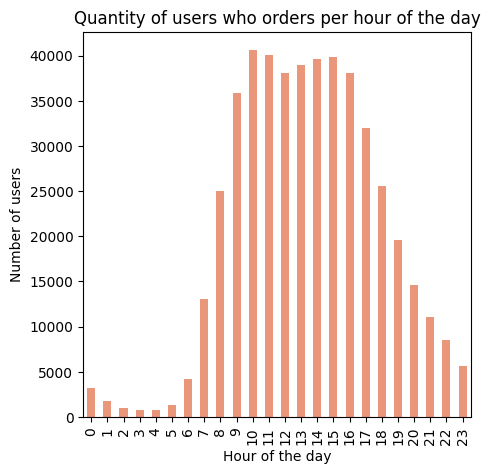

In [ ]:
people_per_hour = df_instacart_orders. groupby(by='order_hour_of_day')['user_id'].count()
#print(people_per_hour)
#print(people_per_hour.max()) #40578

people_per_hour.plot ( x ='order_hour_of_day',
                          y = 'user_id',
                          title = 'Quantity of users who orders per hour of the day',
                          kind ='bar',
                          xlim = [0,23],
                          ylabel = 'Number of users',
                          xlabel = 'Hour of the day',
                          figsize =(5,5),
                      color = 'darksalmon'

)

plt.show()

Escribe aquí tus conclusiones

Se utiliza una gráfica de barras ya que se comparan variables discretas (número de usuarios que hace una orden por hora de la semana).

En esta gráfica podemos notar que se hacen más pedidos entre las 9 y 17 hrs, siendo la hora pico las 10 de la mañana; y la menor proporcion de compras se genera entre las 11 y 6 hrs, siendo más notorio entre las 3 y 4 hrs.

### [A3] ¿Qué día de la semana compran víveres las personas?

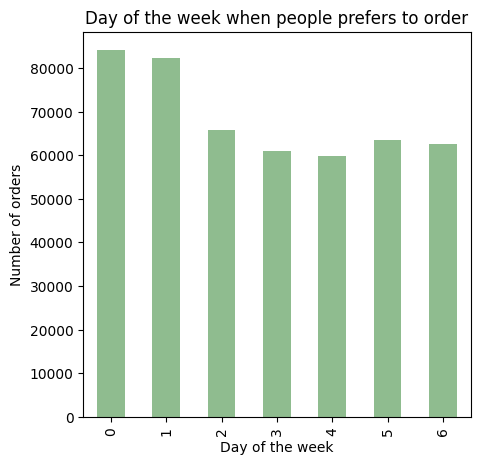

In [ ]:
orders_per_day = df_instacart_orders. groupby(by='order_dow')['order_id'].count()
#print(orders_per_day)
#print(orders_per_day.min()) # = 59810
#print(orders_per_day.max()) #= 84090

orders_per_day.plot ( x ='order_dow',
                          y = 'order_id',
                          title = 'Day of the week when people prefers to order',
                          kind ='bar',
                          ylabel = 'Number of orders',
                          xlabel = 'Day of the week',
                          figsize =(5,5),
                     color ='darkseagreen'

)

plt.show()

Escribe aquí tus conclusiones

Las ordenes no varían en grandes proporciones durante la semana, sin embargo se nota un mayor aunemto de ordenes en fin de semana, especialmente las personas prefieren el domingo para hacer las compras.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

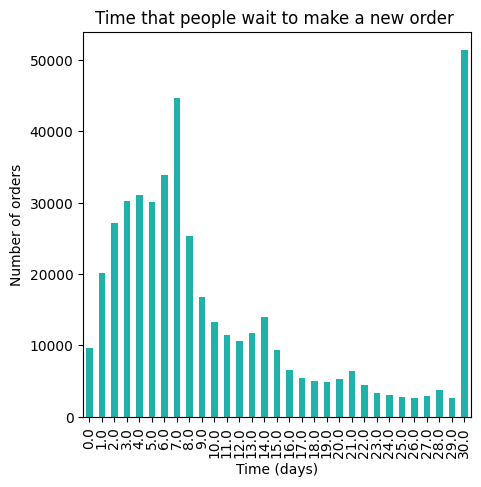

In [ ]:
orders_by_days_since_prior_order = df_instacart_orders. groupby(by='days_since_prior_order')['order_id'].count()
#print(orders_by_days_since_prior_order)
#print(orders_by_days_since_prior_order.max()) #= 51337

orders_by_days_since_prior_order.plot ( x ='days_since_prior_order',
                          y = 'order_id',
                          title = 'Time that people wait to make a new order ',
                          kind ='bar',
                          ylabel = 'Number of orders',
                          xlabel = 'Time (days)',
                          figsize =(5,5),
                        color = 'lightseagreen'

)

plt.show()

Escribe aquí tus conclusiones

El tiempo que tardan los usuarios en generar un nuevo pedido va de 0 (el mismo día) a 30 días. La preferencia es hacer los víveres cada mes (30 días) seguido por el grupo de personas que prefieren hacer la compra cada semana (7 días).



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena esta sección. Los gráficos son muy claros y descriptivos. Muy bien al usar títulos y descripciones de los ejes.
</div>

# [B]

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
#Filtro de filas para día miércoles

order_hours_wendsday = df_instacart_orders[df_instacart_orders['order_dow']== 3].groupby(by='order_hour_of_day')['order_id'].count()
#print(order_hours_wendsday)

In [ ]:
#Filtro de filas para día sábado

order_hours_saturday= df_instacart_orders[df_instacart_orders['order_dow']== 1].groupby(by='order_hour_of_day')['order_id'].count()
#print(order_hours_saturday)

In [ ]:
#Formamos un dataframe con los series obtenidos

df_concat =pd.concat([order_hours_wendsday,order_hours_saturday], axis = 'columns')
df_concat.columns = ['order_quantity_wendnesday','order_quantity_saturday']
#print(df_concat)


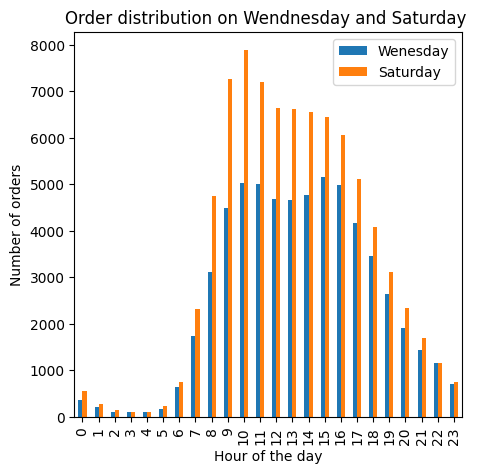

In [ ]:
#Graficamos a partir del dataframe creado

cols =['order_quantity_wendnesday','order_quantity_saturday']

df_concat.plot (
                          y = cols,
                          title = 'Order distribution on Wendnesday and Saturday ',
                          kind ='bar',
                          ylabel = 'Number of orders',
                          xlabel = 'Hour of the day',
                          figsize =(5,5)

)
plt.legend(['Wenesday','Saturday'])
plt.show()

Escribe aquí tus conclusiones

Parece que en general la distribuciones para 'order_hour_of_day' de los miércoles y los sábados son similiares, se sigue un comportamiento parecido en cuanto a las horas preferidas para hacer las compras. Sin embargo, también podemos notar que entre las 9 am y las 4pm es cuando en los sábados aumenta en mayor proporción la cantidad de ordenes realizadas por los usuarios; Siendo el sábado a las 10 am cuando se disparan las ventas.

Ademas podemos notar que el comportamiento entre las 12 y las 15 hrs, es diferente , el sábado disminuye conforme pasan las horas y los miecoles aumenta; estos cambios no parecen significativos.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
#obtener el numero de usuarios que han hecho cierta cantidad del ordenes (el que más ha hecho son 100 pedidos)

orders_per_user = df_instacart_orders.groupby(by='order_number')['user_id'].count()
#print(orders_per_user)

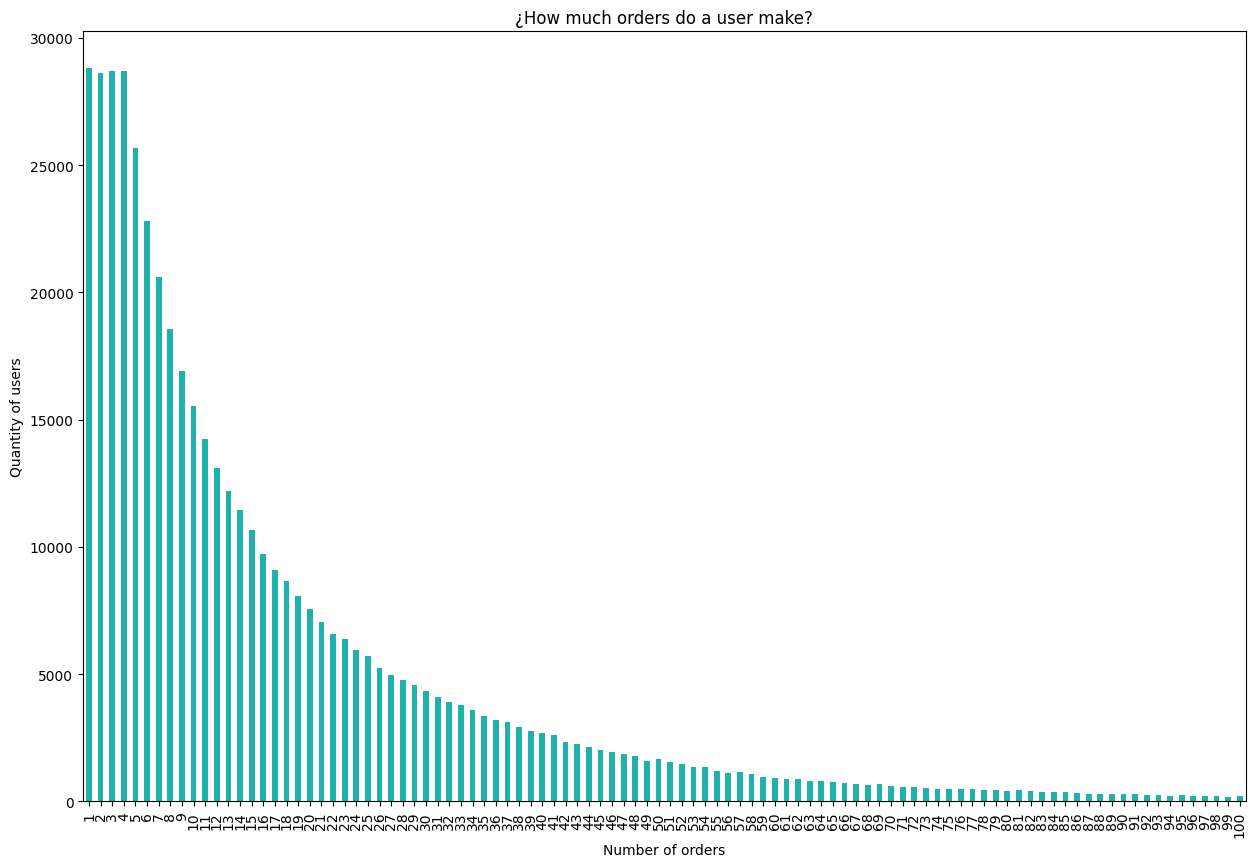

In [ ]:
orders_per_user.plot(x= 'order_number',
                     title = '¿How much orders do a user make?',
                     kind ='bar',
                     xlabel = 'Number of orders',
                     ylabel = 'Quantity of users',
                     rot = 90,
                     figsize =(15,10),
                     color = 'lightseagreen'
                    )

plt.show()

Escribe aquí tus conclusiones

Observamos que es comun que los usuarios generen hasta 4 pedidos, a partir de ahí la gráfica disminuye exponencialmente (cada vez menos usuarios compran un pedido más).

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
popular_products = df_order_products.groupby(by='product_id')['order_id'].count()
#Agrupa por prouct id y ...
#...cuenta las oredenes en las que esta (si esta varias veces en una misma orden cuanta cada vez que aparece)

popular_products = popular_products.sort_values(ascending=False) # Ordena por los que se pidieron más veces
popular_products = popular_products.head(20) # Solo necesitamos los 20 más vendidos
#print(popular_products)

In [ ]:
#relación de nombres y id de productos
product_names = df_products.groupby(by='product_id')['product_name']
#print(product_names.head())


C:\Users\cucum\AppData\Local\Temp\ipykernel_13060\1171632594.py:15: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  popular_product_name_id.plot(x= 'id_name',


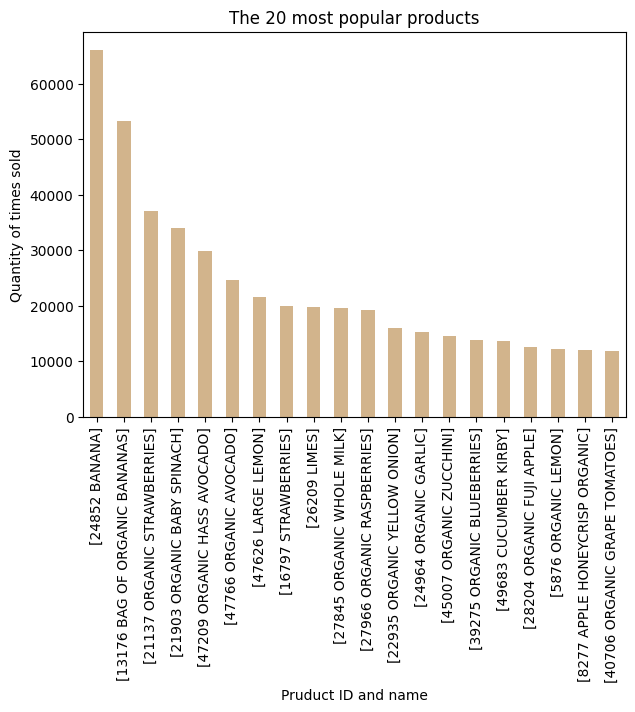

In [ ]:
# se convierten los series en dataframes
popular_products = pd.DataFrame(popular_products)
product_names = pd.DataFrame(product_names, columns= ['product_id','product_name'])


#se fusionan dataframes donde en ambas dataframes aparezca el product id dando como resultado ....
#...un dataframe con el product_id, order_id(el numero de veces que se pidio el producto), y el product_name..
#...de los 20 productos más populares( porpular_products va a limitar las filas que apareceran en el nuevo dataframe)
popular_product_name_id = popular_products.merge(product_names, on ='product_id', how ='inner')

#Una nueva columan con valores juntos de product_id y product_name
popular_product_name_id['id_name'] = popular_product_name_id['product_id'].map(str) + " " + popular_product_name_id['product_name']

#Graficar
popular_product_name_id.plot(x= 'id_name',
                             y= 'order_id',
                             title = 'The 20 most popular products',
                             kind ='bar',
                             xlabel = 'Pruduct ID and name',
                             ylabel = 'Quantity of times sold',
                             rot = 90,
                             figsize =(7,5),
                             color = 'tan',
                             legend = False
                    )

plt.show()

Escribe aquí tus conclusiones

Los 20 productos más vendidos son : BANANA, BAG OF ORGANIC BANANAS, ORGANIC STRAWBERRIES, ORGANIC BABY SPINACH, ORGANIC HASS AVOCADO, ORGANIC AVOCADO, LARGE LEMON, STRAWBERRIES, LIMES, ORGANIC WHOLE MILK, ORGANIC RASPBERRIES, ORGANIC YELLOW ONION, ORGANIC GARLIC, ORGANIC ZUCCHINI,ORGANIC BLUEBERRIES, CUCUMBER KIRBY, ORGANIC FUJI APPLE, ORGANIC LEMON, APPLE HONEYCRISP ORGANIC, ORGANIC GRAPE TOMATOES. En ese orden, las bananas siendo las más pedidas.

Para trabajar con este tipo de preguntas en las que se necesita información de dos tabals distintas, es conveniente primero hacer las operaciones necesarias en cada una de ella (en ese caso primero se obtivieron los id de los 20 productos más vendidos) para despues complementar con la información que se encuentra en la otra tabla (los nombres de los productos) mediante el método .merge(). Hay que tomar en cuenta que el metodo .merge() solo trabaja con objetos DataFrames y que tiene 4 diferentes maneras de fusionerlos ('inner', 'outer','right','left').

# [C]

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
#agrupar por order_id y toma el valor máximo del orden secuencial en que ....
#...se añadieron los productos en el carrito (el numerode productos de esa orden)

orders_product_quantity = df_order_products.groupby(by='order_id')['add_to_cart_order'].max()
orders_product_quantity  = pd.DataFrame(orders_product_quantity)
#print(orders_product_quantity)

In [ ]:
#Agrupamos por cantidad de productos en orden y contamos en cuantas veces aparece este número...
#...(cuantas ordenes tuvieron esta cantidad de artículos)

order_quantity_per_product_quantity = orders_product_quantity.groupby(by='add_to_cart_order')['add_to_cart_order'].count()
#print(order_quantity_per_product_quantity)
#print(df_order_products['add_to_cart_order'].max()) #corroboramos cual es el valor máximo de articulos que ha tenido un pedido


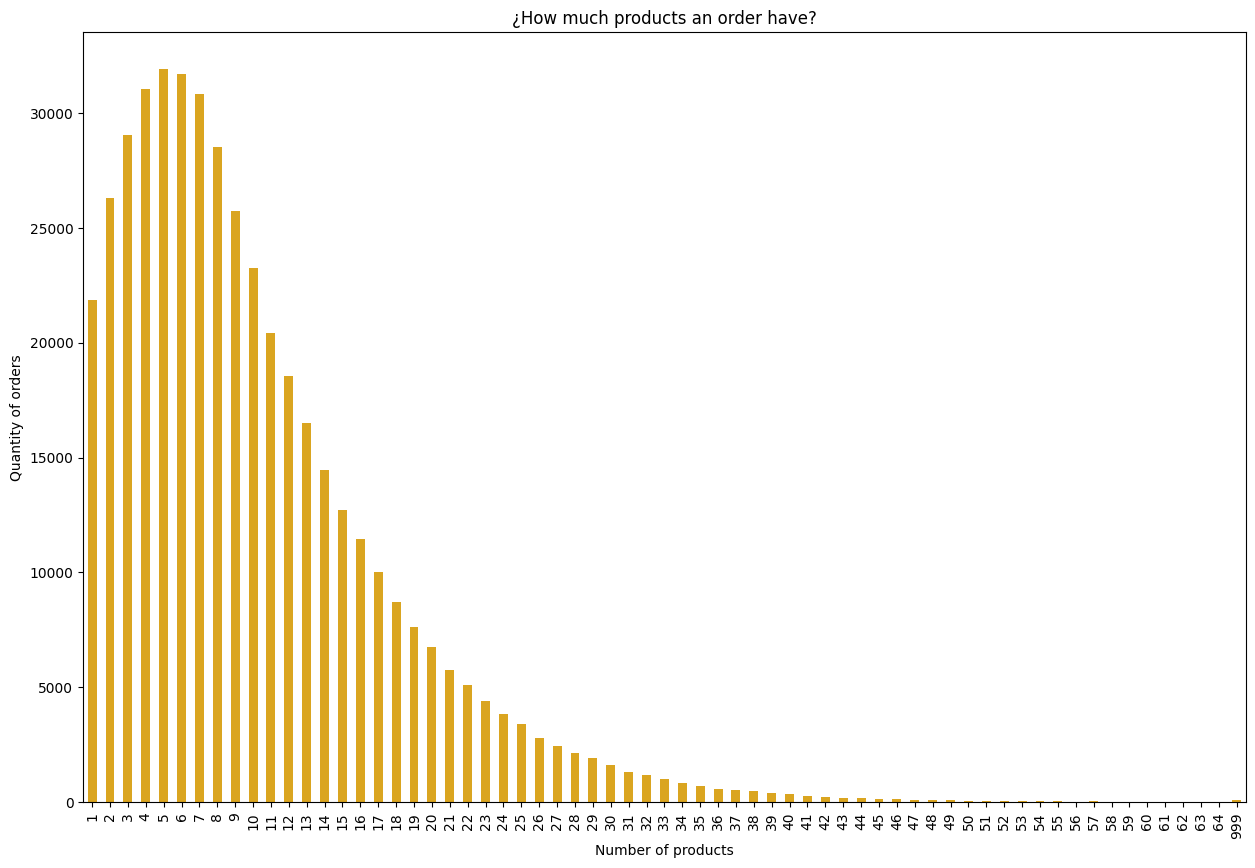

In [ ]:
order_quantity_per_product_quantity.plot(x= 'add_to_cart_order',
                     title = '¿How much products an order have?',
                     kind ='bar',
                     xlabel = 'Number of products',
                     ylabel = 'Quantity of orders',
                     rot = 90,
                     figsize =(15,10),
                     color = 'goldenrod'
                    )

plt.show()

Escribe aquí tus conclusiones

Las personas suelen comprar entre 1 y 10 artículos por pedido, siendo  lo más común 5 productos. Va disminuyendo exponencialmente las personas que hacen pedidos  mayores a  10 artículos. El tope de artículos que hacen normalmente las personas es de 64.

También se nos presenta un dato fuera de rango, en el que se han hecho 70 pedidos de 999 artículos cada uno, debemos recordar que ese es el valor que colocamos en los valores auscentes de la columna 'add_to_cart_order'.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
#Filtrar las filas en donde efectivamente se ha vuelto a pedir el producto

filtered_df = df_order_products[df_order_products['reordered']==1]


In [ ]:
reordered_products = filtered_df.groupby(by='product_id')['reordered'].count() #Agrupa por product id y ...
#...cuenta las veces que este producto se ha vuelto a pedir

reordered_products = reordered_products.sort_values(ascending=False) # Ordena por los que se reordenaron más veces
reordered_products = reordered_products.head(20) # Solo necesitamos los 20 más vendidos
#print(reordered_products)

In [ ]:
#relación de nombres y id de productos
product_names = df_products.groupby(by='product_id')['product_name']
#print(product_names.head())

C:\Users\cucum\AppData\Local\Temp\ipykernel_13060\3302176733.py:16: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  reordered_product_name_id.plot(x= 'id_name',


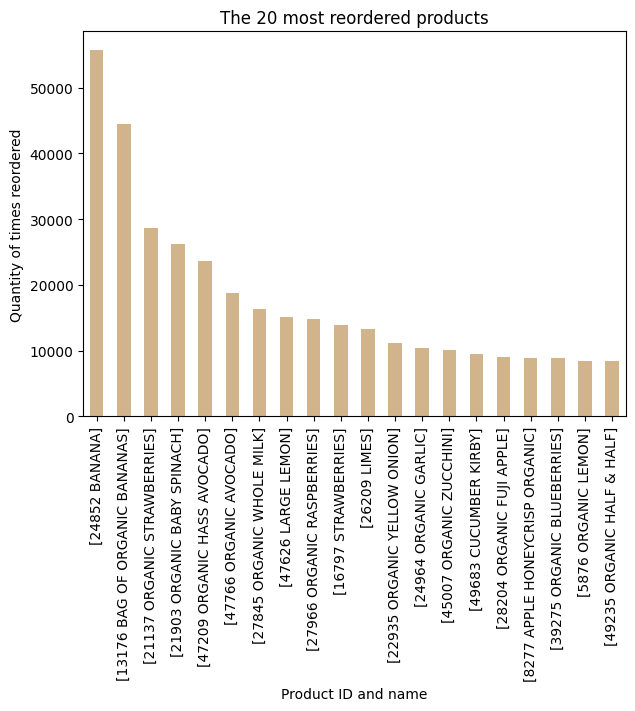

In [ ]:
# se convierten los series en dataframes
reordered_products = pd.DataFrame(reordered_products)
product_names = pd.DataFrame(product_names, columns= ['product_id','product_name'])

#se fusionan dataframes donde en ambas dataframes aparezca el product id dando como resultado ....
#...un dataframe con el product_id, reordered(el numero de veces que se volvio a pedir el producto), y el product_name..
#...de los 20 productos más vueltos a ordenas( reordered_products va a limitar las filas que apareceran en el nuevo dataframe)
reordered_product_name_id = reordered_products.merge(product_names, on ='product_id', how ='inner')
#print(reordered_product_name_id.info())
#print(reordered_product_name_id)

#Una nueva columan con valores juntos de product_id y product_name
reordered_product_name_id['id_name'] = reordered_product_name_id['product_id'].map(str) + " " + reordered_product_name_id['product_name']

#Graficar
reordered_product_name_id.plot(x= 'id_name',
                             y= 'reordered',
                             title = 'The 20 most reordered products',
                             kind ='bar',
                             xlabel = 'Product ID and name',
                             ylabel = 'Quantity of times reordered',
                             rot = 90,
                             figsize =(7,5),
                             color = 'tan',
                             legend = False
                    )

plt.show()

Escribe aquí tus conclusiones

Los 5 productos más vueltos a pedir son los mismos 5 productos más pedidos que hayamos en el apartado anterior, después nos encontramos con otros productos o bien en otro orden. Por lo el hecho de que un producto sea de los más vendidos no quiere decir que sea vuelto a comprar por el mismo usuario.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
times_ordered = df_order_products.groupby(by='product_id')['order_id'].count()
times_ordered = pd.DataFrame(times_ordered)
#print(times_ordered )

In [ ]:
reordered_df = df_order_products[df_order_products['reordered']==1]
times_reordered = filtered_df.groupby(by='product_id')['reordered'].count()
times_reordered = pd.DataFrame(times_reordered)
#print(times_reordered)

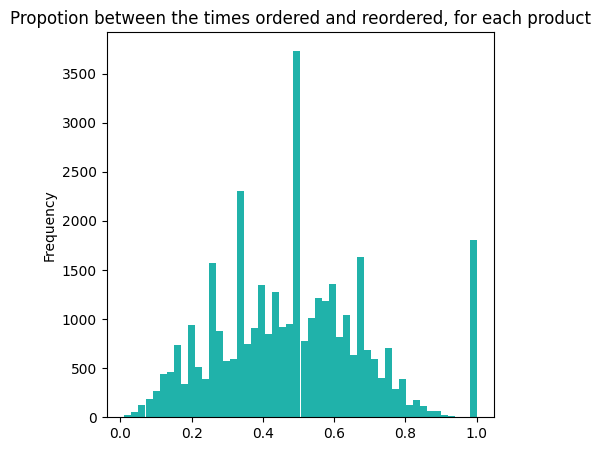

In [ ]:
merged_df = times_ordered.merge(times_reordered, on ='product_id', how ='inner')

merged_df['proportion'] = merged_df['reordered']/merged_df['order_id']
merged_df.sort_values(by='product_id', ascending=True)
#print(merged_df)

merged_df.plot(y='proportion', bins= 50,
                     title = 'Propotion between the times ordered and reordered, for each product',
                     kind ='hist',
                     figsize =(5,5),
                     color = 'lightseagreen',
               legend=False
                    )

plt.show()


Escribe aquí tus conclusiones

Podemos ver que la mayor proporción (10%) de los productos tiene una relación de ser reordenado por las veces de ser pedido de un 0.5 por cierto, esto quiere decir que por cada dos veces que se compra fue vuelto a ordenar 1 vez.


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
#Obtener los pedidos de cada usuario
df_instacart_orders_users = df_instacart_orders.groupby(by='order_id')['user_id']
df_instacart_orders_users = pd.DataFrame(df_instacart_orders_users, columns = ['order_id','user_id'])
#print(df_instacart_orders_users.info())

#Obtener que cuantos productos ya pedidos tiene cada orden
df_instacart_orders_filtered = df_order_products[df_order_products['reordered']==1] #filtrar solo los que son vueltos a pedir
df_instacart_orders_reordered = df_instacart_orders_filtered.groupby(by='order_id')['reordered'].count() #agrupar por orden y contar los ya reordenados
df_instacart_orders_reordered = pd.DataFrame(df_instacart_orders_reordered)
#print(df_instacart_orders_reordered.info())

#Obtener que cuantos productos cada orden
df_instacart_orders_product_quantity = df_order_products.groupby(by='order_id')['product_id'].count() #agrupar por orden y contar los ya reordenados
df_instacart_orders_product_quantity = pd.DataFrame(df_instacart_orders_product_quantity)
#print(df_instacart_orders_reordered.info())

#  Unir los user_id al df order_products
df_order_products_user = df_instacart_orders_users.merge(df_instacart_orders_reordered, on ='order_id', how ='inner')
df_order_products_user = df_order_products_user .merge(df_instacart_orders_product_quantity, on ='order_id', how ='inner')
#print(df_order_products_user)

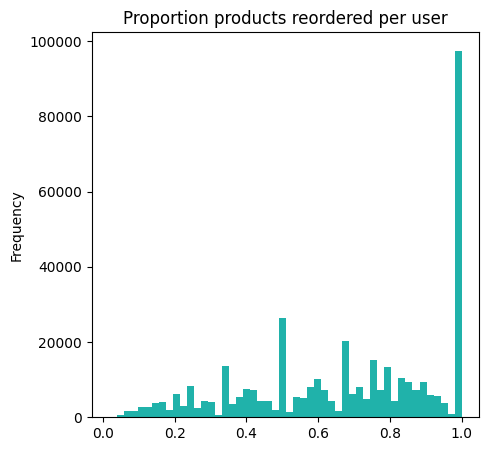

In [ ]:
df_order_products_user['proportion'] = df_order_products_user['reordered']/df_order_products_user['product_id']
df_order_products_user.sort_values(by='order_id', ascending=True)
#print(df_order_products_user)

df_order_products_user.plot(y='proportion', bins= 50,
                     title = 'Proportion products reordered per user',
                     kind ='hist',
                     figsize =(5,5),
                     color = 'lightseagreen',
               legend=False
                    )

plt.show()

Escribe aquí tus conclusiones

De esta gráfica se entiende que la mayoría de los clientes tiende a pedir los mismos productos (proporción 1.0) recurrentemente.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
#Filtrar las filas  donde el producto fue el primero en su carrito

df_order_products_first_product = df_order_products[df_order_products['add_to_cart_order']==1]


In [ ]:
df_first_products_grouped = df_order_products_first_product.groupby(by='product_id')['add_to_cart_order'].count() #Agrupa por product id y ...
#...cuenta las veces que fue puesto primero en el carrito

df_first_products_grouped = df_first_products_grouped.sort_values(ascending=False) # Ordena por los que se pusieron primero más veces
df_first_products_grouped = df_first_products_grouped.head(20) # Solo necesitamos los 20 primeros
#print(reordered_products)

#relación de nombres y id de productos
product_names = df_products.groupby(by='product_id')['product_name']
#print(product_names.head())

# se convierten los series en dataframes
df_first_products_grouped = pd.DataFrame(df_first_products_grouped)
product_names = pd.DataFrame(product_names, columns= ['product_id','product_name'])

#se fusionan dataframes donde en ambas dataframes aparezca el product id dando como resultado ....
#...un dataframe con el product_id,add_to_cart_order(el numero de veces que se pidio primero el producto), y el product_name..
#...de los 20 productos que más veces se añadieron primero al carrito ( df_first_products_grouped va a limitar las filas que apareceran en el nuevo dataframe)
df_first_products_grouped_name_id = df_first_products_grouped.merge(product_names, on ='product_id', how ='inner')
#print(reordered_product_name_id.info())
#print(reordered_product_name_id)


C:\Users\cucum\AppData\Local\Temp\ipykernel_13060\2111961146.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df_first_products_grouped_name_id.plot(x= 'id_name',


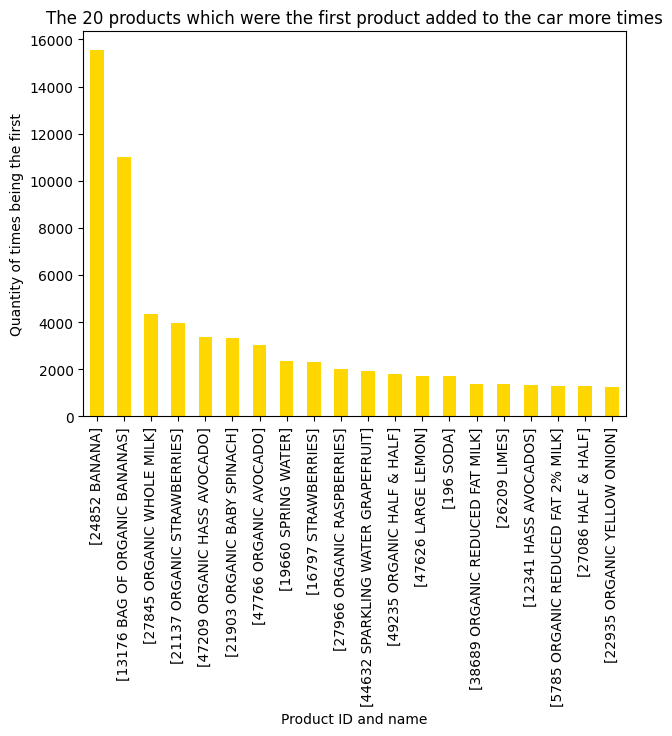

In [ ]:
#Una nueva columan con valores juntos de product_id y product_name
df_first_products_grouped_name_id['id_name'] =df_first_products_grouped_name_id['product_id'].map(str) + " " + df_first_products_grouped_name_id['product_name']

#Graficar
df_first_products_grouped_name_id.plot(x= 'id_name',
                             y= 'add_to_cart_order',
                             title = 'The 20 products which were the first product added to the car more times',
                             kind ='bar',
                             xlabel = 'Product ID and name',
                             ylabel = 'Quantity of times being the first',
                             rot = 90,
                             figsize =(7,5),
                             color = 'gold',
                             legend = False
                    )

plt.show()

Escribe aquí tus conclusiones

Las personas suelen poner en su carrito, justamente los productos más populares : las bananas y bag of organic bananas.

### Conclusion general del proyecto:

La capacidad de poder visualizar los los datos dados en de una determinada base de datos, nos permite principalmente:
1. Comunicar de una manera mucho más clara las respuestas a ciertas preguntas.
2. Obtener un panorama general del comportamiento de los datos.

Para ello hay que tomar en cuenta varios factores :
* Que los datos ya hayan sido adecuadamente preprocesados (revisar tipos de datos, eliminar valores duplicados, completar valores auscentes, etc)
* Escoger adecuadamente el tipo de gráfica que representa mejor los datos a presentar.
* Que sea claro: un título descriptivo, ejes con etiquetas y unidades, que sean adecuadas y consistentes las escalas en los ejes y que leyendas si se representan varios conjuntos de datos en una misma gráfica.

Como analistas de datos hay que recordar que somos responsables de los gráficos que generamos y lo que estos transmiten.
